In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
data = pd.read_csv("PROJECT.csv", delimiter=",", header=0)
data

,City,city_population,density,pct_men,pct_women,pct_hispanic,pct_white,pct_black,pct_native,pct_asian,...,LTM_min_temp,LTM_max_temp,age29andunder_pct,age65andolder_pct,rural_pct,ruralurban_cc,rep_pct,dem_pct,crime_per_100,avg_propty_tax
0,"New York, New York",8336817,10715,47.291425,52.708575,26.1,46.8,12.5,0.1,11.9,...,48.6,64.1,36.439695,14.383705,0.000000,1,9.706266,86.556921,0.036231,11811.008190
1,"Los Angeles, California",3979576,3276,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.053825,6782.028673
2,"Long Beach, California",462628,3523,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.066151,6782.028673
3,"Santa Clarita, California",212979,1162,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.029470,6782.028673
4,"Glendale, California",199303,2525,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.035725,6782.028673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,"Battle Creek, Michigan",51093,463,48.874761,51.125239,5.0,78.3,10.6,0.6,2.1,...,40.5,58.3,38.364107,16.316606,30.977039,3,53.468473,41.012190,0.080781,4082.319040
697,"Florissant, Missouri",50952,1567,47.432867,52.567133,2.8,66.9,23.7,0.2,4.0,...,46.4,65.9,37.622531,16.470077,1.137990,1,39.318414,55.686034,0.046894,4874.699159
698,"Joplin, Missouri",50925,515,48.677883,51.322117,7.7,84.7,2.1,1.4,1.1,...,46.9,68.0,42.184092,13.829062,23.691697,3,72.569631,21.876423,0.143410,1990.127907
699,"Enid, Oklahoma",49688,259,49.545826,50.454174,11.6,75.8,3.0,1.8,0.8,...,47.3,71.2,41.764696,15.415886,21.411357,5,73.740212,20.253339,0.075323,2540.766614


In [ ]:
X_data = data.iloc[:, range(1,45)]
columns_data = data.iloc[:, range(1,45)].columns

In [ ]:
scaler = MinMaxScaler()
X_data = scaler.fit(X_data).transform(X_data)

In [ ]:
pca_data = PCA(n_components=2).fit(X_data)

In [ ]:
pca_data.explained_variance_

array([0.25934841, 0.2177186 ])

In [ ]:
pca_data.explained_variance_ratio_

array([0.24089633, 0.20222839])

In [ ]:
round(pd.DataFrame(pca_data.components_.T,
             index = columns_data,
             columns = ["PCA1", "PCA2"]),3)

,PCA1,PCA2
city_population,-0.012,0.009
density,-0.059,0.062
pct_men,0.007,-0.005
pct_women,-0.007,0.005
pct_hispanic,-0.256,-0.134
pct_white,0.372,0.088
pct_black,-0.038,-0.047
pct_native,0.017,-0.011
pct_asian,-0.205,0.221
pct_pacific,-0.032,0.028


In [ ]:
X_data_pca = pca_data.transform(X_data)

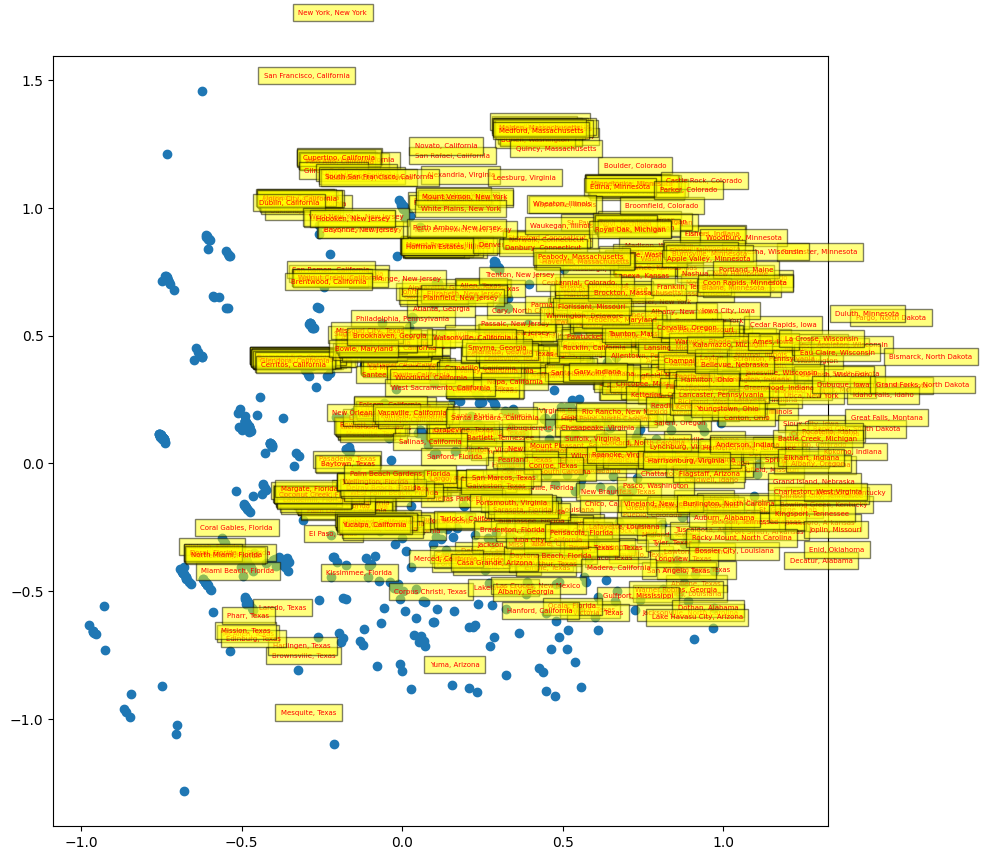

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
for i in range(X_data.shape[0]):
  plt.text(x=X_data_pca[i,0]+0.3,y=X_data_pca[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

In [ ]:
def pca_biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

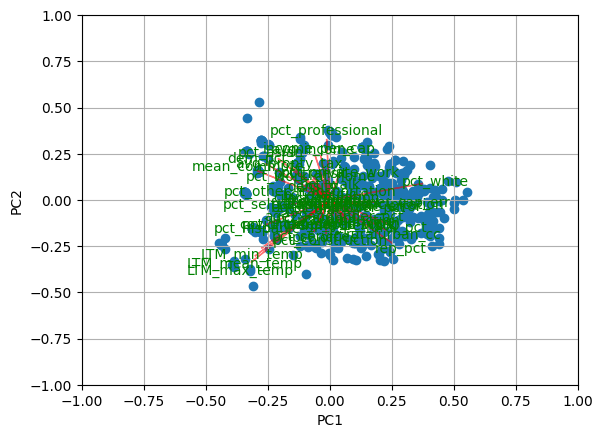

In [ ]:
pca_biplot(X_data_pca,
           np.transpose(pca_data.components_),
           columns_data)
plt.show()

In [ ]:
pca_data = PCA().fit(X_data)
np.cumsum(pca_data.explained_variance_ratio_)

array([0.24089633, 0.44312472, 0.55297909, 0.6316811 , 0.7037492 ,
       0.73999896, 0.77288723, 0.8039051 , 0.82852072, 0.84710231,
       0.86402734, 0.88001624, 0.89407468, 0.90627097, 0.91786509,
       0.92778195, 0.9362599 , 0.94370725, 0.95086082, 0.95662999,
       0.96221622, 0.96740587, 0.97212982, 0.97608846, 0.97938882,
       0.9822198 , 0.98501898, 0.98756414, 0.98978274, 0.99196922,
       0.99377668, 0.99542388, 0.99675003, 0.9977868 , 0.99858566,
       0.99931579, 0.99974184, 0.99998216, 0.99999667, 0.99999844,
       0.99999941, 0.99999974, 1.        , 1.        ])

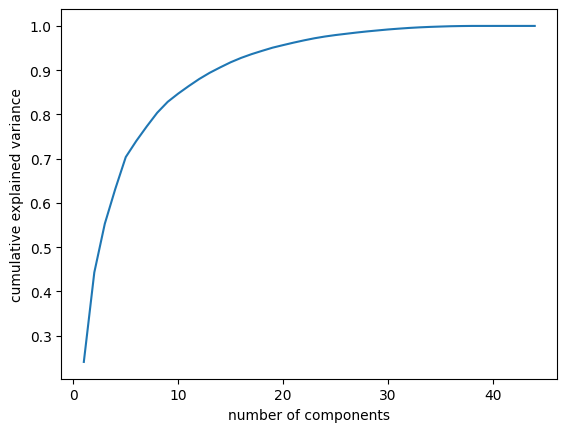

In [ ]:
plt.plot(range(1,45),np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
tsne = TSNE(n_components=2,perplexity=20,verbose=1, n_iter=2000)

In [ ]:
tsne_results = tsne.fit_transform(X_data_pca)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 701 samples in 0.001s...
[t-SNE] Computed neighbors for 701 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 701 / 701
[t-SNE] Mean sigma: 0.025130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.929619
[t-SNE] KL divergence after 2000 iterations: 0.295679


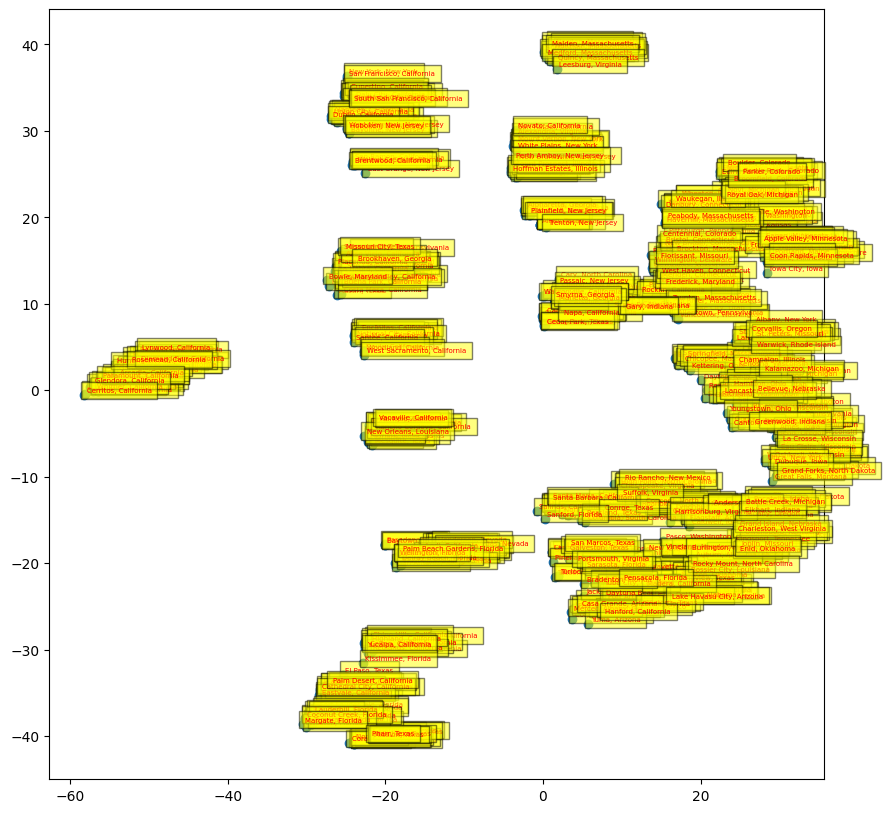

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])
for i in range(tsne_results.shape[0]):
  plt.text(x=tsne_results[i,0]+0.3,y=tsne_results[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

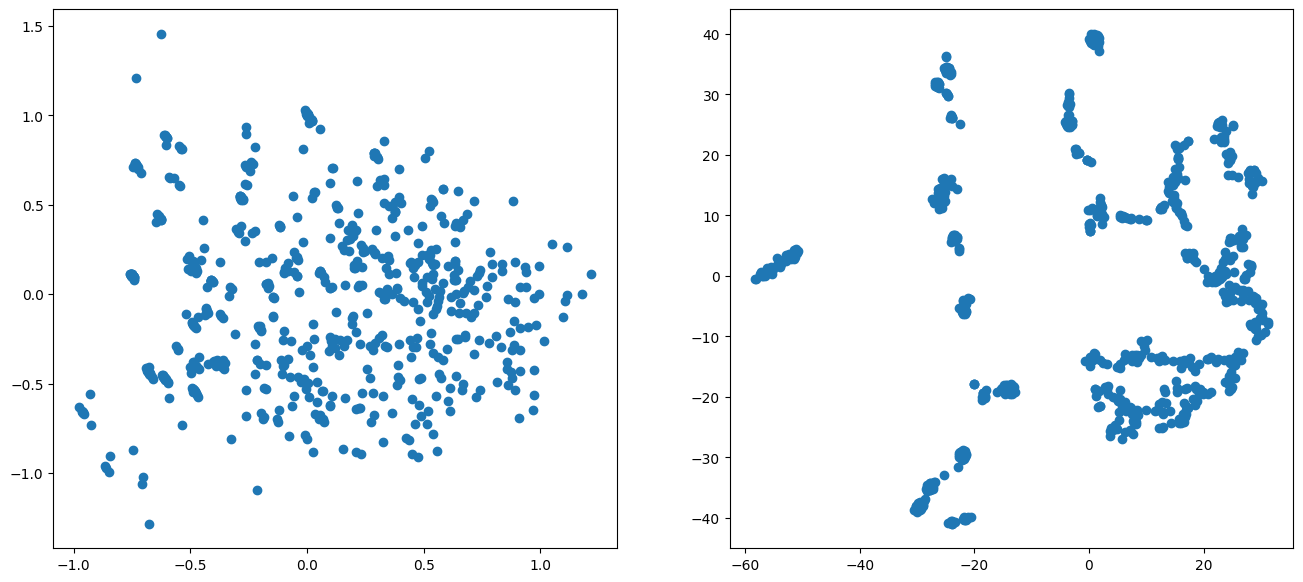

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
ax2 = plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])

In [ ]:


# Assuming 'embedding' is your t-SNE embedding, obtained as described above

# Calculate pairwise distances between points in the embedding
distances = euclidean_distances(tsne_results)

# Find the index of the closest point (excluding itself) for each point
closest_points_indices = np.argmin(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Optionally, you can also find the distances to the closest points
closest_distances = np.min(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Now 'closest_points_indices[i]' contains the index of the closest point (excluding itself) to the ith point,
# and 'closest_distances[i]' contains the distance to the closest point



In [ ]:
# Assuming 'embedding' is your t-SNE embedding, obtained as described above
# Assuming 'closest_points_indices' and 'closest_distances' are obtained using the code snippet provided earlier

# Print the index of the closest point and its distance for each point in the embedding
for i, (closest_index, closest_distance) in enumerate(zip(closest_points_indices, closest_distances)):
    print(f"Point {i}: Closest point index: {closest_index}, Distance: {closest_distance}")


Point 0: Closest point index: 112, Distance: 0.18429815769195557
Point 1: Closest point index: 12, Distance: 0.5120609998703003
Point 2: Closest point index: 38, Distance: 0.4094133675098419
Point 3: Closest point index: 35, Distance: 0.3352654278278351
Point 4: Closest point index: 35, Distance: 0.383674681186676
Point 5: Closest point index: 38, Distance: 0.4198598563671112
Point 6: Closest point index: 19, Distance: 0.37299445271492004
Point 7: Closest point index: 22, Distance: 0.20853200554847717
Point 8: Closest point index: 36, Distance: 0.3997901678085327
Point 9: Closest point index: 13, Distance: 0.31065455079078674
Point 10: Closest point index: 14, Distance: 0.3443751633167267
Point 11: Closest point index: 32, Distance: 0.3568938374519348
Point 12: Closest point index: 1, Distance: 0.5120609998703003
Point 13: Closest point index: 9, Distance: 0.31065455079078674
Point 14: Closest point index: 10, Distance: 0.3443751633167267
Point 15: Closest point index: 19, Distance: 0.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def get_closest_cities(input_city, city_data, tsne_results, num_closest=5, include_same_state=True):
    # Find the index and state of the input city
    city_index = city_data[city_data['City'].str.contains(input_city, case=False, na=False)]
    if city_index.empty:
        return f"No city found matching {input_city}"
    index = city_index.index[0]
    input_state = city_index.iloc[0]['City'].split(', ')[-1]  # Assuming the format 'City, State'

    # Compute distances from the input city to all other cities
    distances = euclidean_distances(tsne_results[index].reshape(1, -1), tsne_results)

    # Get the indices of the closest cities
    sorted_indices = distances.argsort()[0]

    closest_cities = []
    for idx in sorted_indices:
        if idx != index:  # skip the city itself
            city = city_data.iloc[idx]['City']
            state = city.split(', ')[-1]
            if include_same_state or state != input_state:
                closest_cities.append(city)
            if len(closest_cities) == num_closest:
                break

    return closest_cities

# Example usage
input_city = input("Enter a city and state name (i.e. Boston, Massachusetts): ")
include_state = input("Include cities from the same state? (yes/no): ").lower() == 'yes'
closest_cities = get_closest_cities(input_city, data, tsne_results, include_same_state=include_state)
print("Closest cities:", closest_cities)

This visualization compares the average values of key features (such as population, density, and average income) between an input city and its closest recommended cities using bar charts. Each bar represents the mean value of a feature, making it easy to visually assess differences and similarities across the cities. This chart is particularly useful for a quick comparative analysis, helping users understand how the selected cities stack up against each other on important metrics.

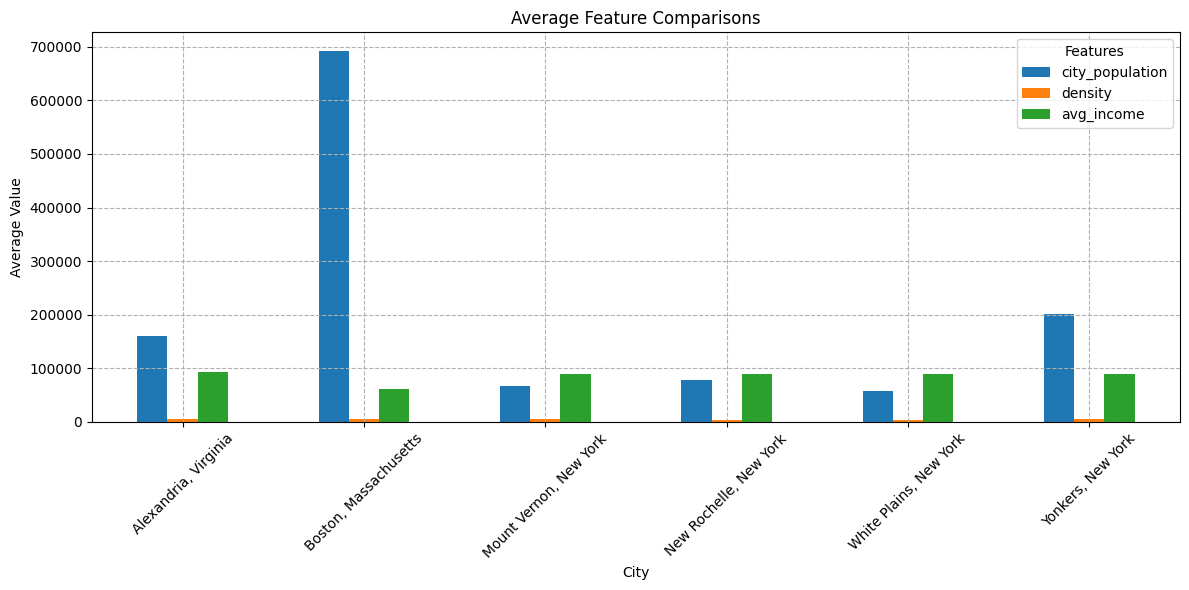

In [ ]:
def plot_feature_comparisons_bar(input_city, closest_cities, features, data):
    relevant_cities = [input_city] + closest_cities
    relevant_data = data[data['City'].isin(relevant_cities)]
    averages = relevant_data.groupby('City')[features].mean()
    averages.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Average Feature Comparisons')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--')
    plt.legend(title='Features')
    plt.tight_layout()
    plt.show()

# Example usage:
# Change features depending on which features you care about most
features_to_compare = ['city_population', 'density', 'avg_income']
plot_feature_comparisons_bar(input_city, closest_cities, features_to_compare, data)

The PCA biplot graphically displays the relationships between the input city and its closest cities based on principal component analysis. By reducing the dimensionality of the data to two principal components, this plot provides insights into the underlying patterns of the data, showing how cities are similar or different in terms of the major contributing variables (features). The arrows represent the loadings of each feature on the principal components, illustrating the influence of various features on the positioning of the cities.

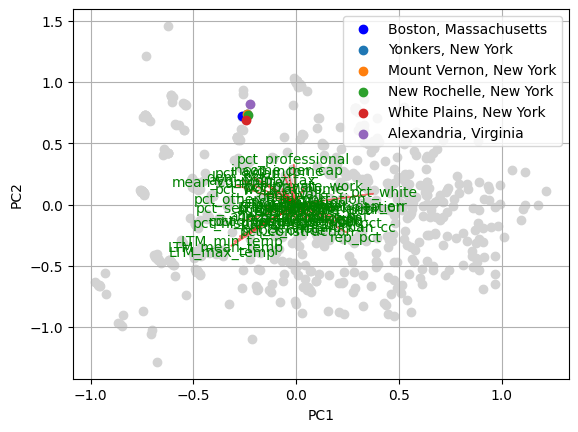

In [ ]:
def highlight_cities_biplot(score, coeff, input_city, closest_cities, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    plt.scatter(xs, ys, color='lightgray')  # Plot all cities in light gray
    input_index = data[data['City'] == input_city].index[0]
    plt.scatter(xs[input_index], ys[input_index], color='blue', label=input_city)  # Highlight input city
    for city in closest_cities:
        index = data[data['City'] == city].index[0]
        plt.scatter(xs[index], ys[index], label=city)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='red', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='green', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid()
    plt.show()

highlight_cities_biplot(X_data_pca, pca_data.components_.T, input_city, closest_cities, labels=columns_data)

The t-SNE plot is a sophisticated visualization that reduces the high-dimensional data into two dimensions, focusing on preserving the small pairwise distances or local similarities. By highlighting the input city and its closest cities, this graph provides a spatial sense of how cities cluster together based on their underlying data characteristics. This visualization is particularly useful for identifying clusters and outliers, helping users see which cities are closely grouped together in a more abstract, data-driven space.

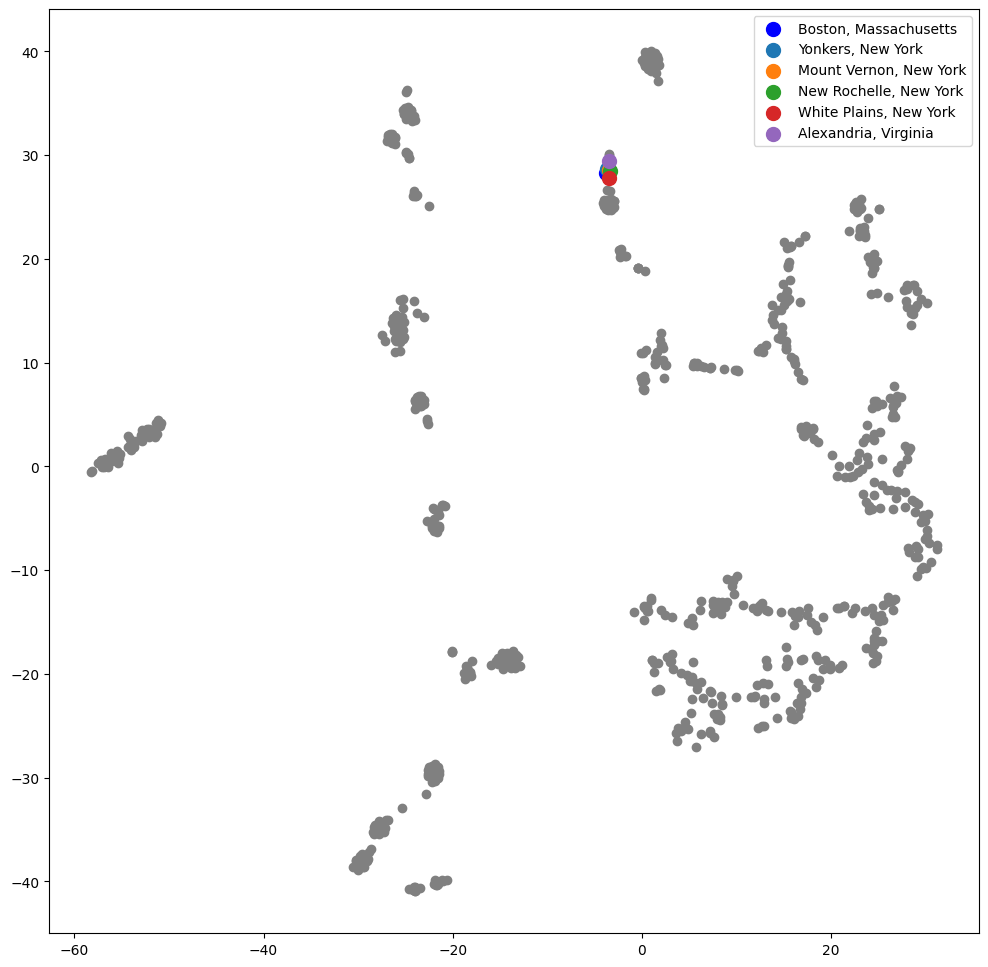

In [ ]:
def plot_tsne_with_highlights(tsne_results, data, input_city, closest_cities):
    plt.figure(figsize=(12, 12))
    plt.scatter(tsne_results[:,0], tsne_results[:,1], color='gray')  # all cities in gray
    input_index = data[data['City'] == input_city].index[0]
    plt.scatter(tsne_results[input_index,0], tsne_results[input_index,1], color='blue', label=input_city, s=100)  # Highlight input city
    for city in closest_cities:
        index = data[data['City'] == city].index[0]
        plt.scatter(tsne_results[index,0], tsne_results[index,1], label=city, s=100)
    plt.legend()
    plt.show()

plot_tsne_with_highlights(tsne_results, data, input_city, closest_cities)

The radar chart, or spider chart, allows for the comparison of multiple normalized features for the input city and its closest cities. Each axis represents a feature, and the values are plotted as points along each axis, connected by lines to form a polygon. This chart is excellent for visualizing the strengths and weaknesses of each city across multiple dimensions simultaneously, giving users a "fingerprint" of each city's characteristics. It's a powerful tool for capturing the essence of cities in a single, comprehensive visual.


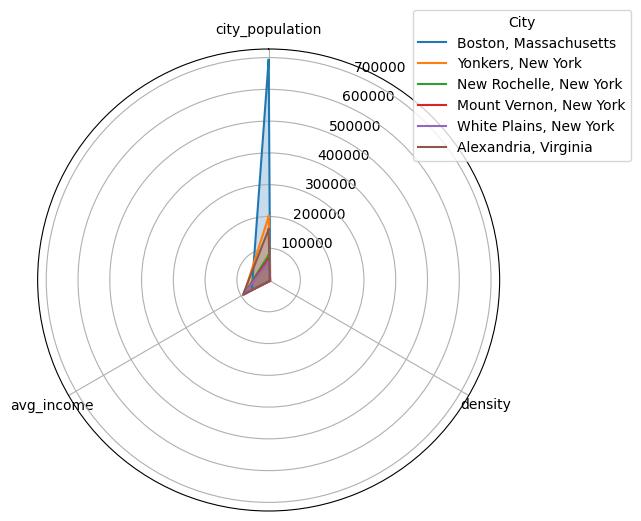

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_chart(input_city, closest_cities, features, data):
    labels = np.array(features)
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Create the angle for the axes
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    helper_df = data[data['City'].isin([input_city] + closest_cities)]

    # Normalize data for comparison
    for index, row in helper_df.iterrows():
        data_to_add = row[features].tolist()
        data_to_add += data_to_add[:1]
        ax.fill(angles, data_to_add, alpha=0.25)
        ax.plot(angles, data_to_add, label=row['City'])

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels)
    ax.legend(title='City', loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Example usage:
plot_radar_chart(input_city, closest_cities, features_to_compare, data)